In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 라이브러리 정의 및 데이터 로드

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
PATH = '/content/drive/MyDrive/AI_Contest/traffic/'

In [ ]:
data_train = pd.read_parquet(PATH+'datasets/data_train.parquet')
data_test = pd.read_parquet(PATH+'datasets/data_test.parquet')
data_info = pd.read_csv(PATH+'datasets/data_info.csv')
print(data_train.shape)
print(data_test.shape)

(4701217, 23)
(291241, 22)


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [ ]:
data_train.drop(['id'], axis=1, inplace=True)
data_test.drop(['id'], axis=1, inplace=True)

In [ ]:
data = pd.concat([data_train.drop('target', axis=1), data_test], axis=0)
target = data_train['target']

## 데이터 탐색

### Data Information

In [ ]:
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


### Data Analysis

#### data

In [ ]:
data

,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,20220623,목,17,1,106,지방도1112호선,0,0,60.00,0.00,...,0.00,3,제3교래교,33.43,126.66,없음,제3교래교,33.43,126.66,없음
1,20220728,목,21,2,103,일반국도11호선,0,0,60.00,0.00,...,0.00,0,광양사거리,33.50,126.53,있음,KAL사거리,33.50,126.53,없음
2,20211010,일,7,2,103,일반국도16호선,0,0,80.00,0.00,...,0.00,0,창고천교,33.28,126.37,없음,상창육교,33.28,126.36,없음
3,20220311,금,13,2,107,태평로,0,0,50.00,0.00,...,0.00,0,남양리조트,33.25,126.57,없음,서현주택,33.25,126.57,없음
4,20211005,화,8,2,103,일반국도12호선,0,0,80.00,0.00,...,0.00,0,애월샷시,33.46,126.33,없음,애월입구,33.46,126.33,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,20220827,토,5,1,103,일반국도16호선,0,0,80.00,0.00,...,0.00,0,월산마을,33.47,126.46,없음,도근교,33.47,126.46,없음
291237,20220819,금,20,2,103,일반국도11호선,0,0,60.00,0.00,...,0.00,0,영주교,33.31,126.60,없음,하례입구삼거리,33.30,126.60,없음
291238,20220805,금,11,1,107,신대로,0,0,30.00,0.00,...,0.00,0,마리나사거리,33.49,126.50,있음,칠오광장사거리,33.50,126.50,있음
291239,20220812,금,7,2,107,경찰로,0,0,60.00,0.00,...,0.00,0,국민의료보험관리공단,33.25,126.51,없음,의료보험조합,33.26,126.51,없음


In [ ]:
data_train = pd.concat([data[:len(data_train)], target], axis=1)
data_test = data[len(data_train):]

In [ ]:
cols = data_train.columns[:-2] # target 제외
for i in range(len(cols)):
  print(f'{cols[i]}: {len(data_train[cols[i]].value_counts())}')

base_date: 281
day_of_week: 7
base_hour: 24
lane_count: 3
road_rating: 3
road_name: 61
multi_linked: 2
connect_code: 2
maximum_speed_limit: 6
vehicle_restricted: 1
weight_restricted: 4
height_restricted: 1
road_type: 2
start_node_name: 487
start_latitude: 586
start_longitude: 586
start_turn_restricted: 2
end_node_name: 487
end_latitude: 586
end_longitude: 586


In [ ]:
numeric_feature = data_train.columns[(data_train.dtypes=='int64') | (data_train.dtypes=='float')]
object_feature = data_train.columns[data_train.dtypes=='object']

#### base_date 4계절 변환 + 성/비수기

train data는 2022년 8월 이전(data는 연속적이지 않음)

test data는 2022년 8월 data

In [ ]:
start = min(data_train['base_date'])
end = max(data_train['base_date'])
print(f'날짜는 {start} ~ {end}')

날짜는 20210901 ~ 20220731


base_date가 유의미한 데이터인지 확인

- 월 별로 속도 차이 즉, 관람객 인파가 몰렸을 시에 속도가 줄어드는지 확인

4월 data는 존재하지 않음.(8월은 test data)



In [ ]:
month = [False] * 13
for i in range(len(data_train)):
  date = data_train['base_date'][i]
  month[int(str(date)[4:6])] = True

In [ ]:
for i in range(1, 13):
  if month[i] == False:
    print(f'{i}월 data는 존재하지 않습니다.')

4월 data는 존재하지 않습니다.
8월 data는 존재하지 않습니다.


In [ ]:
monthly_speed = [[] for _ in range(13)]
for i in range(len(data_train)):
  date = data_train['base_date'][i]
  monthly_speed[int(str(date)[4:6])].append(target[i])

7월이 상대적으로 평균 속도가 느린 것을 알 수 있음.

그러나 8월에 대한 데이터가 없으므로 좀 더 고민해 보아야 함.

In [ ]:
for i in range(1, 13):
  if monthly_speed[i]:
    if 9 <= i <= 12:
      print(f'2021년 {i}월의 data 개수 : {len(monthly_speed[i])}, 평균 속도는 {round(sum(monthly_speed[i]) / len(monthly_speed[i]), 2)}')
    else:
      print(f'2022년 {i}월의 data 개수 : {len(monthly_speed[i])}, 평균 속도는 {round(sum(monthly_speed[i]) / len(monthly_speed[i]), 2)}')
  else:
    if i == 4:
      print(f'2022년 {i}월의 평균 속도는 X')
    else:
      print(f'2022년 {i}월의 평균 속도는 X')

2022년 1월의 data 개수 : 569884, 평균 속도는 43.03
2022년 2월의 data 개수 : 550807, 평균 속도는 43.26
2022년 3월의 data 개수 : 505671, 평균 속도는 43.55
2022년 4월의 평균 속도는 X
2022년 5월의 data 개수 : 463709, 평균 속도는 42.64
2022년 6월의 data 개수 : 490137, 평균 속도는 42.61
2022년 7월의 data 개수 : 274695, 평균 속도는 36.28
2022년 8월의 평균 속도는 X
2021년 9월의 data 개수 : 570909, 평균 속도는 43.69
2021년 10월의 data 개수 : 537916, 평균 속도는 43.5
2021년 11월의 data 개수 : 120978, 평균 속도는 43.73
2021년 12월의 data 개수 : 616511, 평균 속도는 43.03


4계절로 변환 고려

In [ ]:
data_test['base_date']

0         20220825
1         20220809
2         20220805
3         20220818
4         20220810
            ...   
291236    20220827
291237    20220819
291238    20220805
291239    20220812
291240    20220812
Name: base_date, Length: 291241, dtype: int64

#### day_of_week 월~목, 금, 토, 일로 카테고리

In [ ]:
week_dict = { '월': 0, '화': 1, '수': 2, '목': 3, '금': 4, '토': 5, '일': 6 }
week = [[] for _ in range(7)]
for i in range(len(data_train)):
  day = data_train['day_of_week'][i]
  week[week_dict[day]].append(target[i])

In [ ]:
week_list = list(week_dict.keys())

평일에 비해 주말이 한산하며 금요일에 차량이 더 많은 것을 알 수 있지만 극명한 차이를 보이진 않음

In [ ]:
for i in range(7):
  print(f'{week_list[i]}요일 data 개수 : {len(week[i])}, 평균 속도는 {round(sum(week[i]) / len(week[i]), 2)}')

월요일 data 개수 : 661643, 평균 속도는 42.76
화요일 data 개수 : 662498, 평균 속도는 42.7
수요일 data 개수 : 675583, 평균 속도는 42.77
목요일 data 개수 : 674070, 평균 속도는 42.77
금요일 data 개수 : 684024, 평균 속도는 42.45
토요일 data 개수 : 669767, 평균 속도는 42.89
일요일 data 개수 : 673632, 평균 속도는 43.18


#### base_hour 24시간을 모두 레이블인코딩

In [ ]:
hour = [[] for _ in range(24)]
for i in range(len(data_train)):
  h = data_train['base_hour'][i]
  hour[h].append(target[i])

시간대 별로 속도가 차이가 나는 것을 볼 수 있음

**시간대를 두개로 나눌지 여러개로 나눌지 고민
- 한산한 시간대 - 23~6시(새벽)
- 상대적으로 밀리는 시간대 - 7~22시(출,퇴근 시간 + 이동하는 시간대)

In [ ]:
for i in range(24):
  print(f'{i}시 data 개수 : {len(hour[i])}, 평균 속도는 {round(sum(hour[i]) / len(hour[i]), 2)}')

0시 data 개수 : 154158, 평균 속도는 48.74
1시 data 개수 : 182353, 평균 속도는 49.76
2시 data 개수 : 169322, 평균 속도는 50.28
3시 data 개수 : 155938, 평균 속도는 50.54
4시 data 개수 : 165284, 평균 속도는 49.75
5시 data 개수 : 181128, 평균 속도는 47.2
6시 data 개수 : 189418, 평균 속도는 45.55
7시 data 개수 : 199061, 평균 속도는 43.68
8시 data 개수 : 201875, 평균 속도는 41.66
9시 data 개수 : 205327, 평균 속도는 40.88
10시 data 개수 : 206316, 평균 속도는 40.22
11시 data 개수 : 208515, 평균 속도는 39.82
12시 data 개수 : 211833, 평균 속도는 39.84
13시 data 개수 : 214297, 평균 속도는 39.73
14시 data 개수 : 214182, 평균 속도는 39.56
15시 data 개수 : 214541, 평균 속도는 39.35
16시 data 개수 : 208420, 평균 속도는 39.13
17시 data 개수 : 208377, 평균 속도는 38.47
18시 data 개수 : 207500, 평균 속도는 38.24
19시 data 개수 : 209870, 평균 속도는 40.1
20시 data 개수 : 205059, 평균 속도는 41.11
21시 data 개수 : 203585, 평균 속도는 42.17
22시 data 개수 : 200629, 평균 속도는 43.99
23시 data 개수 : 184229, 평균 속도는 45.81


#### lane_count OneHotEncoding

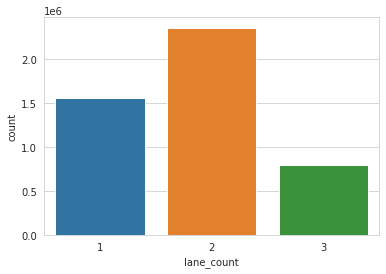

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="lane_count", data=data_train)
plt.show()

In [ ]:
lanes = [[] for _ in range(4)]
for i in range(len(data_train)):
  lane = data_train['lane_count'][i]
  lanes[lane].append(target[i])

In [ ]:
for i in range(1, 4):
  print(f'{i}차로 data 개수 : {len(lanes[i])}, 평균 속도는 {round(sum(lanes[i]) / len(lanes[i]), 2)}')

1차로 data 개수 : 1558531, 평균 속도는 43.57
2차로 data 개수 : 2352092, 평균 속도는 44.92
3차로 data 개수 : 790594, 평균 속도는 34.92


In [ ]:
lane_corr = {
    'x': [1, 2, 3],
    'y': [43.57, 44.92, 34.92]
}
lane_corr_df = pd.DataFrame(data=lane_corr)

어느정도의 선형성을 띄는 것을 알 수 있음.

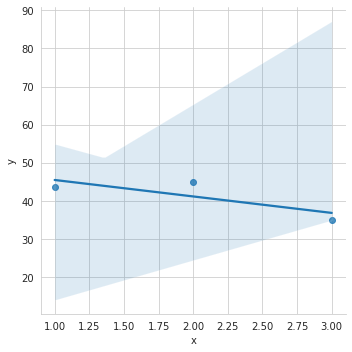

In [ ]:
sns.lmplot(x='x', y='y', data=lane_corr_df)
plt.show()

In [ ]:
data_test['lane_count'].value_counts()

2    126893
3     85286
1     79062
Name: lane_count, dtype: int64

In [ ]:
data_train[data_train['multi_linked'] == 1]['lane_count'].value_counts()

1    2239
Name: lane_count, dtype: int64

즉, 중용구간 1일때 차로수가 1개인 것을 보아 전용구간인 것을 알 수 있음.

=> 0일 때 중용구간, 1일때 전용구간

#### road_rating OneHotEncoding

103 - 일반국도

106 - 지방도

107 - 시,군도

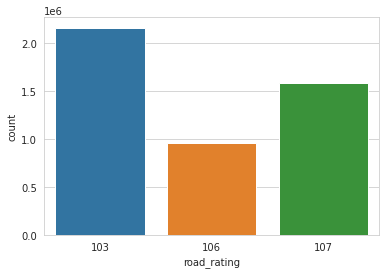

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="road_rating", data=data_train)
plt.show()

In [ ]:
rates = [[] for _ in range(108)]
for i in range(len(data_train)):
  rate = data_train['road_rating'][i]
  rates[rate].append(target[i])

등급에 선형성이 띈다고 볼 수는 있으나 인과관계가 없다고 생각됨 => OneHotEncoding 고려

In [ ]:
for i in [103, 106, 107]:
  print(f'{i}등급 도로의 data 개수 : {len(rates[i])}, 평균 속도는 {round(sum(rates[i]) / len(rates[i]), 2)}')

103등급 도로의 data 개수 : 2159511, 평균 속도는 46.39
106등급 도로의 data 개수 : 959492, 평균 속도는 48.02
107등급 도로의 data 개수 : 1582214, 평균 속도는 34.7


#### multi_linked 그대로

중용구간 여부

전용구간 - 한 노선으로 이루어져있는 도로


중용구간 - 두 노선 이상으로 이루어져있는 도로

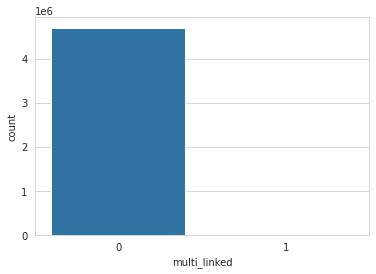

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="multi_linked", data=data_train)
plt.show()

In [ ]:
data_train['multi_linked'].value_counts()

0    4698978
1       2239
Name: multi_linked, dtype: int64

In [ ]:
links = [[] for _ in range(2)]
for i in range(len(data_train)):
  link = data_train['multi_linked'][i]
  links[link].append(target[i])

확실히 속도가 느린 것을 알 수 있음 => OneHotEncoding 혹은 그대로

In [ ]:
ox = {0:'O', 1:'X'}
for i in range(2):
  print(f'중용구간{ox[i]} data 개수 : {len(links[i])}, 평균 속도는 {round(sum(links[i]) / len(links[i]), 2)}')

중용구간O data 개수 : 4698978, 평균 속도는 42.79
중용구간X data 개수 : 2239, 평균 속도는 36.64


#### connect_code 103->1로 치환


000 - 연결로 아님

103 - 일반국도 연결로

선형성을 없애기 위해서 0, 1로 바꾸고 OneHotEncoding 고민

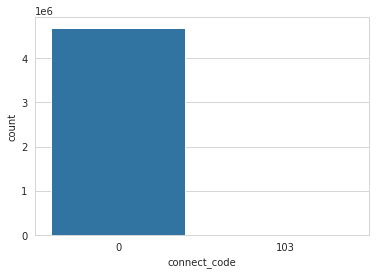

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="connect_code", data=data_train)
plt.show()

In [ ]:
data_train['connect_code'].value_counts()

0      4689075
103      12142
Name: connect_code, dtype: int64

In [ ]:
def change_binary(x):
  if x == 103:
    return 1
  else:
    return 0

In [ ]:
data_train['connect_code'] = data_train['connect_code'].apply(change_binary)

In [ ]:
connects = [[] for _ in range(2)]
for i in range(len(data_train)):
  connect = data_train['connect_code'][i]
  connects[connect].append(target[i])

두 관계를 이해하지는 못했지만 의미있는 피쳐라고 생각

일반국도 연결로에서 평균 속도가 월등히 빠른 것을 알 수 있음.

In [ ]:
ox = {0:'X', 1:'O'}
for i in range(2):
  print(f'연결로{ox[i]} data 개수 : {len(connects[i])}, 평균 속도는 {round(sum(connects[i]) / len(connects[i]), 2)}')

연결로X data 개수 : 4689075, 평균 속도는 42.75
연결로O data 개수 : 12142, 평균 속도는 57.95


#### maximum_speed_limit 40->80대체, OneHotEncoding

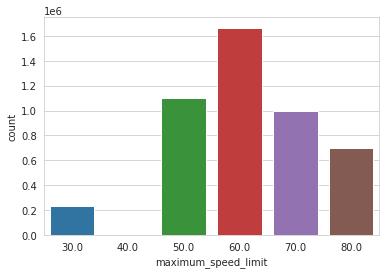

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="maximum_speed_limit", data=data_train)
plt.show()

In [ ]:
data_train['maximum_speed_limit'].value_counts()

60.00    1665573
50.00    1103682
70.00     995077
80.00     700334
30.00     229761
40.00       6790
Name: maximum_speed_limit, dtype: int64

In [ ]:
data_train['maximum_speed_limit'] = data_train['maximum_speed_limit'].astype('int64')

In [ ]:
speeds = [[] for _ in range(81)]
for i in range(len(data_train)):
  speed = data_train['maximum_speed_limit'][i]
  speeds[speed].append(target[i])

일반적인 경우 속도제한과 평균 속도는 선형성을 띄는 것을 알 수 있지만

개수가 적은 40km/s data의 평균속도가 높은 것으로 나옴 =>

 테스트 세트에는 40km/s가 없고 훈련에 지장을 줄 수 있으므로 제거를 하거나 비슷한 평균 속도인 80km/s로 대체 생각

In [ ]:
for i in range(30, 81, 10):
  print(f'최고속도제한 {i} data 개수 : {len(speeds[i])}, 평균 속도는 {round(sum(speeds[i]) / len(speeds[i]), 2)}')

최고속도제한 30 data 개수 : 229761, 평균 속도는 32.22
최고속도제한 40 data 개수 : 6790, 평균 속도는 62.77
최고속도제한 50 data 개수 : 1103682, 평균 속도는 35.49
최고속도제한 60 data 개수 : 1665573, 평균 속도는 42.32
최고속도제한 70 data 개수 : 995077, 평균 속도는 41.37
최고속도제한 80 data 개수 : 700334, 평균 속도는 60.7


In [ ]:
data_test['maximum_speed_limit'].value_counts()

60.00    108606
70.00     80356
50.00     71315
30.00     21350
80.00      9614
Name: maximum_speed_limit, dtype: int64

#### weight_restricted OneHotEncoding

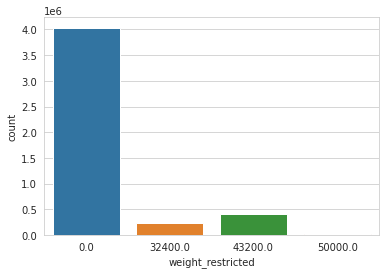

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="weight_restricted", data=data_train)
plt.show()

In [ ]:
data_train['weight_restricted'].value_counts()

0.00        4032874
43200.00     410361
32400.00     239305
50000.00      18677
Name: weight_restricted, dtype: int64

In [ ]:
data_train['weight_restricted'] = data_train['weight_restricted'].astype('int64')

In [ ]:
weights = [[] for _ in range(50001)]
for i in range(len(data_train)):
  weight = data_train['weight_restricted'][i]
  weights[weight].append(target[i])

선형성을 띄지는 않지만 의미가 있는 데이터 (좀 더 고려)

In [ ]:
for i in [0, 32400, 43200, 50000]:
  print(f'최대하중제한 {i} data 개수 : {len(weights[i])}, 평균 속도는 {round(sum(weights[i]) / len(weights[i]), 2)}')

최대하중제한 0 data 개수 : 4032874, 평균 속도는 40.96
최대하중제한 32400 data 개수 : 239305, 평균 속도는 47.45
최대하중제한 43200 data 개수 : 410361, 평균 속도는 57.88
최대하중제한 50000 data 개수 : 18677, 평균 속도는 47.09


#### height_restricted drop

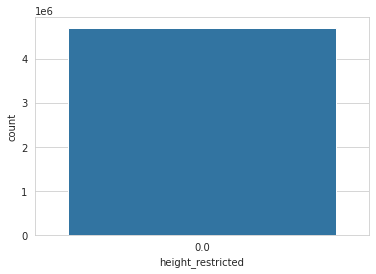

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="height_restricted", data=data_train)
plt.show()

의미 없는 데이터로 판단 => 피쳐 삭제

In [ ]:
data_train['height_restricted'].value_counts()

0.00    4701217
Name: height_restricted, dtype: int64

In [ ]:
data_test['height_restricted'].value_counts()

0.00    291241
Name: height_restricted, dtype: int64

#### road_type 3->1치환

000 - 일반도로

003 - 교량

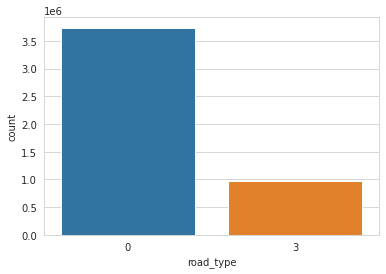

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="road_type", data=data_train)
plt.show()

In [ ]:
data_train['road_type'].value_counts()

0    3737117
3     964100
Name: road_type, dtype: int64

0, 1로 변환

In [ ]:
def change_binary(x):
  if x == 3:
    return 1
  else:
    return 0

In [ ]:
data_train['road_type'] = data_train['road_type'].apply(change_binary)

In [ ]:
roads = [[] for _ in range(2)]
for i in range(len(data_train)):
  road = data_train['road_type'][i]
  roads[road].append(target[i])

교량 도로에서 속도가 더 빠른 것을 알 수 있음 => OneHotEncoding

In [ ]:
ox = {0:'O', 1:'X'}
for i in range(2):
  print(f'일반도로{ox[i]} data 개수 : {len(roads[i])}, 평균 속도는 {round(sum(roads[i]) / len(roads[i]), 2)}')

일반도로O data 개수 : 3737117, 평균 속도는 41.16
일반도로X data 개수 : 964100, 평균 속도는 49.1


#### start_latitude min-max

minmax 처리

#### start_longitude min-max

minmax 처리

#### start_turn_restricted 그대로

없음 : 0

있음 : 1

In [ ]:
def change_binary(x):
  if x == '없음':
    return 0
  else:
    return 1

In [ ]:
data_train['start_turn_restricted'] = data_train['start_turn_restricted'].apply(change_binary)

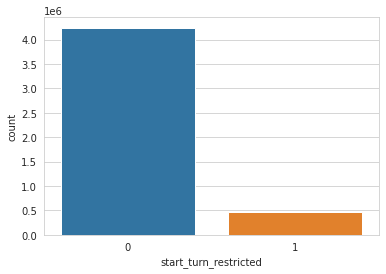

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="start_turn_restricted", data=data_train)
plt.show()

In [ ]:
data_train['start_turn_restricted'].value_counts()

0    4239701
1     461516
Name: start_turn_restricted, dtype: int64

In [ ]:
start_turns = [[] for _ in range(2)]
for i in range(len(data_train)):
  start_turn = data_train['start_turn_restricted'][i]
  start_turns[start_turn].append(target[i])

회전제한이 있는 경우 평균 속도가 낮은 것을 알 수 있음

In [ ]:
ox = {0:'X', 1:'O'}
for i in range(2):
  print(f'시작지점의 회전제한 유무 {ox[i]} data 개수 : {len(start_turns[i])}, 평균 속도는 {round(sum(start_turns[i]) / len(start_turns[i]), 2)}')

시작지점의 회전제한 유무 X data 개수 : 4239701, 평균 속도는 43.61
시작지점의 회전제한 유무 O data 개수 : 461516, 평균 속도는 35.24


#### end_latitude min-max

minmax 처리

#### end_longitude min-max

minmax 처리

#### end_turn_resricted 그대로

In [ ]:
data_train['end_turn_restricted'] = data_train['end_turn_restricted'].apply(change_binary)

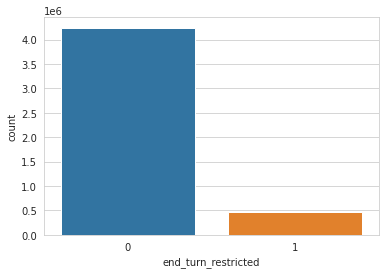

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="end_turn_restricted", data=data_train)
plt.show()

In [ ]:
data_train['end_turn_restricted'].value_counts()

0    4239599
1     461618
Name: end_turn_restricted, dtype: int64

In [ ]:
end_turns = [[] for _ in range(2)]
for i in range(len(data_train)):
  end_turn = data_train['end_turn_restricted'][i]
  end_turns[end_turn].append(target[i])

회전제한이 있는 경우 평균 속도가 낮은 것을 알 수 있음

In [ ]:
ox = {0:'X', 1:'O'}
for i in range(2):
  print(f'도착지점의 회전제한 유무 {ox[i]} data 개수 : {len(end_turns[i])}, 평균 속도는 {round(sum(end_turns[i]) / len(end_turns[i]), 2)}')

도착지점의 회전제한 유무 X data 개수 : 4239599, 평균 속도는 43.65
도착지점의 회전제한 유무 O data 개수 : 461618, 평균 속도는 34.92


#### road_name 평균속도 레이블인코딩

평균속도 내림차순으로 레이블 인코딩

#### start_node_name 평균속도 레이블 인코딩

In [ ]:
snnu = data_train['start_node_name'].unique()

In [ ]:
df_1 = data_train[(data_train['start_node_name'] == snnu[0]) & (data_train['end_node_name'] == '제3교래교')]
me = sum(df_1['target']) / len(df_1['target'])
l = []
for i in df_1.index:
  if df_1.loc [i, 'target'] < me:
    l.append(int(str(df_1.loc[i, 'base_date'])[4:6]))

#### end_node_name 평균속도 레이블 인코딩

전처리파일에 코드있음

#### vehicle_resricted drop

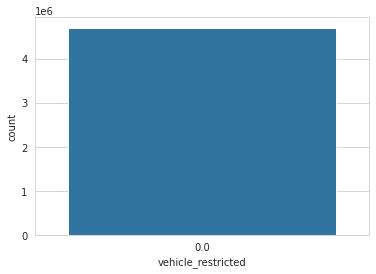

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="vehicle_restricted", data=data_train)
plt.show()

의미 없는 데이터 => 피쳐 삭제

In [ ]:
data_train['vehicle_restricted'].value_counts()

0.00    4701217
Name: vehicle_restricted, dtype: int64

In [ ]:
data_test['vehicle_restricted'].value_counts()

0.00    291241
Name: vehicle_restricted, dtype: int64

#### corr analysis

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   base_date              int64  
 1   day_of_week            object 
 2   base_hour              int64  
 3   lane_count             int64  
 4   road_rating            int64  
 5   road_name              object 
 6   multi_linked           int64  
 7   connect_code           int64  
 8   maximum_speed_limit    float64
 9   vehicle_restricted     float64
 10  weight_restricted      float64
 11  height_restricted      float64
 12  road_type              int64  
 13  start_node_name        object 
 14  start_latitude         float64
 15  start_longitude        float64
 16  start_turn_restricted  object 
 17  end_node_name          object 
 18  end_latitude           float64
 19  end_longitude          float64
 20  end_turn_restricted    object 
 21  target                 float64
dtypes: float64(9), int

In [ ]:
data_train.drop([['road_name', 'multi_linked']])

In [ ]:
data_train[data_train['start_node_name']]

,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
126,20220119,수,11,1,106,지방도97호선,0,0,60.0,0.0,...,3,제1성읍교,33.420695,126.758507,없음,제1성읍교,33.420435,126.758749,없음,72.0
195,20210903,금,1,1,106,지방도97호선,0,0,60.0,0.0,...,0,제1성읍교,33.420695,126.758507,없음,제주민속식품가공공장,33.428841,126.750881,없음,67.0
528,20220212,토,3,1,106,지방도97호선,0,0,60.0,0.0,...,3,제1성읍교,33.420435,126.758749,없음,제1성읍교,33.420695,126.758507,없음,60.0
715,20220512,목,19,1,106,지방도97호선,0,0,60.0,0.0,...,0,제1성읍교,33.420695,126.758507,없음,제주민속식품가공공장,33.428841,126.750881,없음,58.0
899,20220523,월,20,1,106,지방도97호선,0,0,60.0,0.0,...,3,제1성읍교,33.420695,126.758507,없음,제1성읍교,33.420435,126.758749,없음,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700432,20220525,수,19,1,106,지방도97호선,0,0,60.0,0.0,...,3,제1성읍교,33.420695,126.758507,없음,제1성읍교,33.420435,126.758749,없음,71.0
4700484,20220302,수,17,1,106,지방도97호선,0,0,60.0,0.0,...,3,제1성읍교,33.420695,126.758507,없음,제1성읍교,33.420435,126.758749,없음,74.0
4700603,20211011,월,15,1,106,지방도97호선,0,0,60.0,0.0,...,0,제1성읍교,33.420695,126.758507,없음,제주민속식품가공공장,33.428841,126.750881,없음,59.0
4700888,20210921,화,11,1,106,지방도97호선,0,0,60.0,0.0,...,3,제1성읍교,33.420695,126.758507,없음,제1성읍교,33.420435,126.758749,없음,70.0


In [ ]:
data_train[(data_train['maximum_speed_limit'] == 40)]

,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
84,20220607,화,6,1,103,일반국도12호선,0,103,40.0,0.0,...,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,74.0
380,20220205,토,6,1,103,일반국도12호선,0,103,40.0,0.0,...,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,67.0
1182,20220620,월,19,1,103,일반국도12호선,0,103,40.0,0.0,...,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,70.0
1409,20211104,목,13,1,103,일반국도95호선,0,103,40.0,0.0,...,0,전표1교,33.320921,126.350630,없음,동광1교차로,33.322851,126.351447,없음,41.0
1846,20211027,수,5,1,103,일반국도12호선,0,103,40.0,0.0,...,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697727,20210915,수,20,1,103,일반국도95호선,0,103,40.0,0.0,...,0,전표1교,33.320921,126.350630,없음,동광1교차로,33.322851,126.351447,없음,50.0
4697968,20211028,목,1,1,103,일반국도12호선,0,103,40.0,0.0,...,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,74.0
4698565,20211010,일,21,1,103,일반국도12호선,0,103,40.0,0.0,...,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,64.0
4699868,20211208,수,6,1,103,일반국도12호선,0,103,40.0,0.0,...,0,양계장,33.475446,126.388193,없음,구엄교,33.478037,126.388439,없음,70.0


In [ ]:
data_train[(data_train['start_node_name'] == '전표1교')]['maximum_speed_limit'].unique()

array([80., 40.])

In [ ]:
data_train[(data_train['road_name'] == '일반국도12호선')]['start_node_name'].unique()

array(['애월샷시', '오조한도교입구', '종합운동장입구사거리', '동부장의운수사', '거로마을', '미수2교', '창천교',
       '농협하나로마트', '봉좌교', '양계장', '세훈빌리지', '연수동삼거리', '구엄교', '하천교차로',
       '새못사거리', '만장굴삼거리', '홈마트', '외도초교앞삼거리', '한대교', '명월교차로', '두모삼거리',
       '신효교', '세화입구', '새마을창고', '하귀입구', '한지교차로', '명월하동', '애월사거리', '내도동입구',
       '봉천2교', '이호해수욕장입', '중앙교', '신흥삼거리', '신양교차로', '서동', '인제사거리',
       '이호동입구2', '한국병원앞', '삼성의원사거리', '별도교', '서사라사거리', '신창사', '천주교회',
       '도두동입구', '금능사거리', '시흥교차로', '종달교차로', '중문입구', '관광단지입구', '한동교차로',
       '현사마을', '방주건강원', '함덕입구', '오정카센타', '덕수사거리', '중문입구삼거리', '회수입구',
       '장로교회', '오조교차로', '한전아파트', '서중입구', '안덕계곡', '영락교회', '중앙로타리', '송내교차로',
       '도평마을', '동산교', '행원교차로', '동명사거리', '김녕교차로', '이호동입구1', '오라교', '북촌',
       '오현고앞삼거리', '국립제주박물관', '월령교', '종달1교차로', '오일장입구', '영락교차로', '도두삼거리',
       '오라3동', '제주교대', '김녕입구', '화북남문입구삼거리', '창천삼거리', '진동1로', '월령삼거리',
       '영락리경로당', '농업용관정', '송개미숯불갈비', '오라오거리', '효례교', '오돌또기', '남당동',
       '동광장교', '외도연대마을', '진드르', '문예회관사거리', '신촌입구', '마을창고', '창흥교차로',
       '성산교차로',